Dataset after cleaning:
  LOCATION  INDICATOR SUBJECT MEASURE FREQUENCY  TIME     Value Flag Codes
0      AUS  RENEWABLE     TOT    KTOE         A  1960  4436.932        NaN
1      AUS  RENEWABLE     TOT    KTOE         A  1961  4490.510        NaN
2      AUS  RENEWABLE     TOT    KTOE         A  1962  4407.097        NaN
3      AUS  RENEWABLE     TOT    KTOE         A  1963  4628.738        NaN
4      AUS  RENEWABLE     TOT    KTOE         A  1964  4497.396        NaN

Feature columns after encoding:
Index(['TIME', 'LOCATION_ALB', 'LOCATION_ARE', 'LOCATION_ARG', 'LOCATION_ARM',
       'LOCATION_AUS', 'LOCATION_AUT', 'LOCATION_AZE', 'LOCATION_BEL',
       'LOCATION_BEN',
       ...
       'LOCATION_URY', 'LOCATION_USA', 'LOCATION_UZB', 'LOCATION_VEN',
       'LOCATION_VNM', 'LOCATION_WLD', 'LOCATION_YEM', 'LOCATION_ZAF',
       'LOCATION_ZMB', 'LOCATION_ZWE'],
      dtype='object', length=142)

📊 MODEL EVALUATION
✅ Mean Squared Error: 12656563805.880926
✅ R² Score: -0.7668807498287373


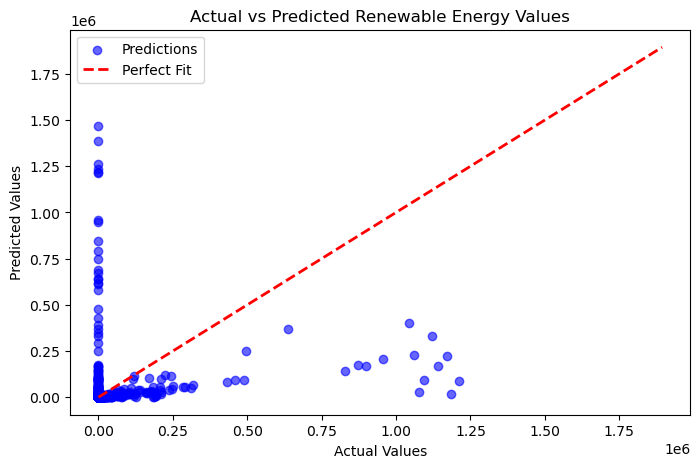

In [11]:
# Week 2 - Renewable Energy ML Implementation (Fixed)

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("renewable_energy/renewable_energy.csv")

# Step 3: Clean data
# Drop rows where target (Value) is missing
df = df.dropna(subset=["Value"])

print("Dataset after cleaning:")
print(df.head())

# Step 4: Select features and target
X = df[["LOCATION", "SUBJECT", "TIME"]]
y = df["Value"]

# Step 5: Encode categorical features
X = pd.get_dummies(X, columns=["LOCATION", "SUBJECT"], drop_first=True)

print("\nFeature columns after encoding:")
print(X.columns)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Train model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 MODEL EVALUATION")
print(f"✅ Mean Squared Error: {mse}")
print(f"✅ R² Score: {r2}")

# Step 10: Visualization (Actual vs Predicted)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Renewable Energy Values")
plt.legend()
plt.show()
